# 2D Linear Regression Using Ordinary Least Squares (OLS)

Essentially we have two features instead of one influencing our system

## Process

* Loading the data
* Exploring the data
* Adding bias to our input 
* Solve for weights using OLS
* Make a Prediction
* Determining how well the model performed

## Equations

The hypothesis $h_\theta(x)$ is given by the linear model

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$

where $\theta_0, \theta_1, \theta_2, ..., \theta_n$ are the weights of the model we need to solve for, 

$x_1, x_2, ..., x_n$ are the features of the model, and

$n$ represents the number of features.

Now, for convenience of notation a new feature is defined as $x_0 = 1$.

This allows us to construct two $n + 1$ dimensional column vectors

$$ \vec{x} = \begin{bmatrix} x_0 \\ x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix}\qquad \vec{\theta} = \begin{bmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ \vdots \\ \theta_n \end{bmatrix} $$

Now, the hypothesis can be written as

$$ h_\theta(x) = \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n $$

Note: $h_\theta(x)$ is still the same as the orginal representation since $x_0 = 1$.

Now, we can simply write $h_\theta(x)$ as

$$ h_\theta(x) = \vec{\theta}^T\vec{x} $$

where $\vec{\theta}^T$ is the transpose of $\vec{\theta}$, i.e.,

$$ \vec{\theta}^T = \begin{bmatrix} \theta_0 & \theta_1 & \theta_2 & \cdots & \theta_n \end{bmatrix} $$

Note: $h_\theta(x) = \vec{\theta}^T\vec{x}$ uses one training example 

Now, if we have m training examples, i.e., $(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), ..., (x^{(m)}, y^{(m)})$ with $n$ features then we can write each feature vector as

$$  \vec{x}^{(i)} = \begin{bmatrix} x_0^{(i)} \\ x_1^{(i)} \\ x_2^{(i)} \\ \vdots \\ x_n^{(i)} \end{bmatrix} $$

where $i = 1, 2, ..., m$.

From here we can construct a feature matrix $X$ where the transpose of each feature vector corresponds to a row of $X$ starting with the first feature vector, i.e., $\vec{x}^{(1)}$ and ending with the $m^{th}$ feature vector, i.e., $\vec{x}^{(m)}$

$$ X = \begin{bmatrix} (x^{(1)})^T \\ (x^{(2)})^T \\ \vdots \\ (x^{(m)})^T \end{bmatrix} = \begin{bmatrix} x_0^{(1)} && x_1^{(1)} && x_2^{(1)} && \cdots && x_n^{(1)} \\ x_0^{(2)} && x_1^{(2)} && x_2^{(2)} && \cdots && x_n^{(2)} \\ && && \vdots \\ x_0^{(m)} && x_1^{(m)} && x_2^{(m)} && \cdots && x_n^{(m)} \end{bmatrix}$$

We can then construct the label or output vector $\vec{y}$ which consists of the output from each training example 

$$ \vec{y} = \begin{bmatrix} y^{(1)} \\ y^{(2)} \\ \vdots \\ y^{(m)} \end{bmatrix} $$ 

Now we can compute $\theta$ by using OLS

$$ \theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

where $X^T$ is the transpose of the X matrix and, $(X^TX)^{-1}$ is the inverse of the $X^TX$ matrix.

Note: the way the feature matrix $X$ and the output vector $\vec{y}$ are constructed has the same form as the data in the text file except for the feature vector $\vec{x_0}$ which is appended to the feature matrix.

Also, the way the equation for the hypothesis is written for multiple training examples is different when compared to the equation that was used for a single training example. This is because each feature vector was transposed from a $(n + 1)$ $x$ $1$ column vector to a $1$ $x$ $(n + 1)$ row vector that were then combined to construct an $m$ $x$ $(n + 1)$ feature matix. So, multiplying the weight vector $\vec{\theta}$ which is a $(n + 1)$ $x$ $1$ column vector by the $m$ $x$ $(n + 1)$ feature matrix means the hypothesis equation must be

$$ h_\theta(X) = X\theta$$

Note: here we will be performing 2D Linear Regression which means $n = 2$ 

In [16]:
import os

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

## Loading the Data

In [17]:
data = np.loadtxt('data/housing.txt', delimiter=',')
m = len(data)
n = len(data[0]) - 1
print("Shape of data", data.shape)
print("Number of samples", m)
print("Number of features", n)
X, y = data[:, :n], data[:, n]

Shape of data (47, 3)
Number of samples 47
Number of features 2


## Exploring the Data

### Plotting the Data

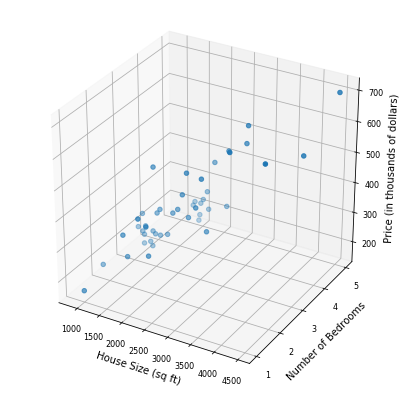

In [18]:
# Scatter Plot 
fig = plt.figure(figsize=(7,7))

ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:,0], X[:,1], y/1000)

ax.xaxis.set_tick_params(labelsize=8)
ax.yaxis.set_tick_params(labelsize=8)
ax.zaxis.set_tick_params(labelsize=8)

plt.yticks(np.arange(1, 6, 1))

ax.set_xlabel('House Size (sq ft)')
ax.set_ylabel('Number of Bedrooms')
ax.set_zlabel('Price (in thousands of dollars)');

## Visualizing the shape of our data

X is a feature matrix that is m x n where:

* m = number of samples
* n = number of features

y is our ouput vector that is m x 1

In [19]:
print("The shape of X is", X.shape)
print("The shape of y is", y.shape)

The shape of X is (47, 2)
The shape of y is (47,)


## Adding bias to our input

This is the process of adding the feature $x_0$ to

$$ h_\theta(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

To do this we add a column of 1's to our feature matrix and call it $x_0$

In [23]:
# here we add a column of 1's to X for our bias (intercept term) we'll use concatenate for numpy arrays with shape (m,n)
# Note: concatenate will add a column of 1's to X each time this cell is run
X = np.concatenate([np.ones((m, 1)), X], axis=1)

print("Shape of X is", X.shape)
print("Example of a feature vector", X[0])

Shape of X is (47, 3)
Example of a feature vector [1.000e+00 2.104e+03 3.000e+00]


## Solve for weights using OLS

Basically we just need to transform the following function into python code

$$\theta = \left( X^T X\right)^{-1} X^T\vec{y}$$

In [24]:
# calculate the weights not using gradient descent
theta = np.linalg.pinv(X.T@X)@X.T@y
print("Shape of theta is", theta.shape)
print("theta is", theta)

Shape of theta is (3,)
theta is [89597.90954361   139.21067402 -8738.01911255]


## Making a prediction

Now we can create an input vector and get an estimated price for the home 

In [8]:
# input_vec = [size of house (sq ft), number of bedrooms]
input_vec = [1650, 3]

# add a bias since all inputs must begin with 1
input_vec_bias = np.append(1, input_vec)

# make a prediction
profit = theta.T@input_vec_bias

print("Input vector", input_vec)
print("Input vector with bias", input_vec_bias)
print("theta", theta)
print("Profit", profit)

Input vector [1650, 3]
Input vector with bias [   1 1650    3]
theta [89597.90954361   139.21067402 -8738.01911255]
Profit 293081.4643349892


## Determine how well the model performed

We need some numerical measure to see how well our model performed

For this we can use $R^2$ (R-Squared)

We ususally use this for any regression not just Linear Regression

The definition for R-Squared is the following:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where: 

$SS_{res}$ is the sum of squared residual 

and

$SS_{tot}$ is the sum of squared total

These are defined as:

$$SS_{res} = \sum^N_{i=1}(\y}^{(i)} - h_\theta(X))^2$$

<br />

$$SS_{tot} = \sum^N_{i=1}(y^{(i)} - \bar{y}^{(i)})^2$$

$R^2 = 1$ is a perfect model

$R^2 = 0$ is basically the average (50%)

$R^2 = -$ is worse than just computing the average

In [40]:
# Note: h can also be calculated as h = theta@X.T, h = theta.T@X.T, or h = X@theta.T because the shape of theta is (3,) in numpy which means it can act as a row vector or a column vector and it will return h with the same shape of (47,)  
h = X@theta

SSres = sum((y-h)**2)

SStot = sum((y-y.mean())**2)

R2 = 1 - SSres/SStot

print('SSres is: ', SSres)
print('SStot is:', SStot)
print('R-squared is: ', R2)

SSres is:  192068324756.66586
SStot is: 719208918474.553
R-squared is:  0.7329450180289142
